# Observations and Insights

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import numpy as np


# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"],keep="last")]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
duplicate_mice = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"],keep="first")]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = merge_df[merge_df["Mouse ID"] =="g989"]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop(all_duplicate_mice.index)

#cleaned_df = merge_df.drop_duplicates(["Mouse ID","Timepoint"], keep = 'first')
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group by drug regimen
grouped_drugs = cleaned_df.groupby(["Drug Regimen"])

In [9]:
# Collect summary stats by grouped data
average_tumor = grouped_drugs["Tumor Volume (mm3)"].mean()
median_tumor = grouped_drugs["Tumor Volume (mm3)"].median()
var_tumor = grouped_drugs["Tumor Volume (mm3)"].var()
std_tumor = grouped_drugs["Tumor Volume (mm3)"].std()
sem_tumor = grouped_drugs["Tumor Volume (mm3)"].sem()

In [10]:
# Put summary sats into a DataFrame
summary_stats_df = pd.DataFrame({"Mean": average_tumor,
                                "Median": median_tumor,
                                "Variance": var_tumor,
                                "Standard Deviation": std_tumor,
                                "SEM": sem_tumor})
# Print the DataFrame
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Bar and Pie Charts

Text(0, 0.5, 'Measurements')

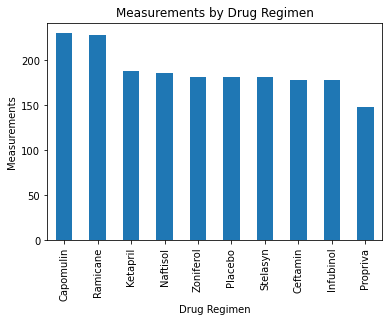

In [12]:
# Bar and pie charts

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Collect value counts of each drug regimen
count_drugs = cleaned_df["Drug Regimen"].value_counts()

# Plot the results in a bar chart
drug_chart = count_drugs.plot(kind='bar', title="Measurements by Drug Regimen")

# Set axis labels
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Measurements")



Text(0, 0.5, 'Measurements')

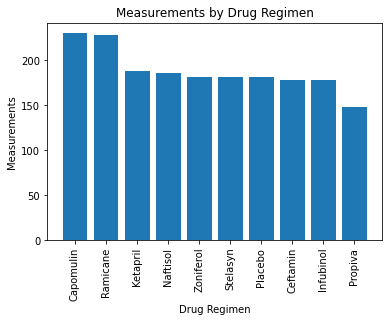

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Collect value counts of each drug regimen
drug_count = cleaned_df["Drug Regimen"].value_counts()
num_drugs = np.arange(len(drug_count))
tick_locations = [value for value in num_drugs]

drug_list_names = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Ceftamin","Infubinol","Propiva"]

# Plot the results in a bar chart
plt.bar(num_drugs, drug_count, align="center")
plt.xticks(tick_locations, drug_list_names,  rotation="vertical")

# Add a title and labels
plt.title("Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")


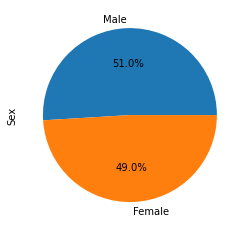

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Collect value counts of each sex 
gender_counts = cleaned_df["Sex"].value_counts()

# Plot the results in a pie chart 
pandas_pie = gender_counts.plot(kind="pie", autopct="%1.1f%%")

Text(0.5, 1.0, 'Gender Distribution')

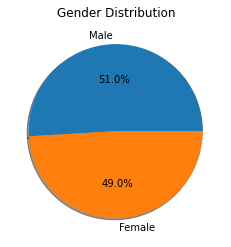

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify the lists for sex and value counts 
labels = ["Male", "Female"]

sizes = cleaned_df["Sex"].value_counts()

explode = (0,0)

# Plot the results in a pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow = True)
plt.title("Gender Distribution")


# Quartiles, outliers, and boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Group by Mouse ID
tumorvolume_groups = cleaned_df.groupby(["Mouse ID"])

# Find the max timepoint for the grouped IDs and place into a new DataFrame
max_tumor_df = pd.DataFrame(tumorvolume_groups["Timepoint"].max())

max_tumor_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
quartile_df = pd.merge(cleaned_df,max_tumor_df, on="Mouse ID")

# Rename the column headers
quartile_df = quartile_df.rename(columns={"Timepoint_y": "Last Timepoint"})
quartile_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatments:
    
    treatments_check = quartile_df.loc[quartile_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    volume_data.append(treatments_check)

In [19]:
# Determine outliers using upper and lower bounds
quartiles = volume_data.quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq=quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

AttributeError: 'list' object has no attribute 'quantile'

In [20]:
numpy.quantile

NameError: name 'numpy' is not defined

([<matplotlib.axis.XTick at 0x2b74ab775b0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

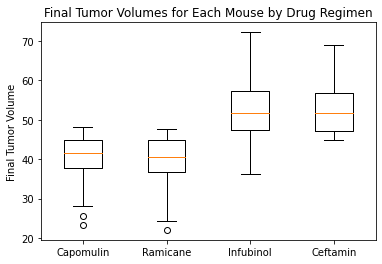

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(volume_data)

# Add title and labels
plt.title("Final Tumor Volumes for Each Mouse by Drug Regimen")
plt.ylabel("Final Tumor Volume")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

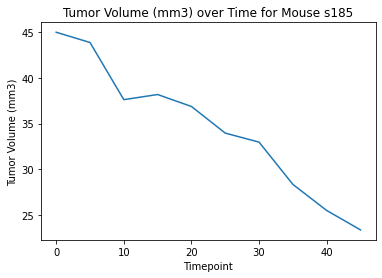

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify a Mouse ID that used Capomulin
mouse_choice = cleaned_df[cleaned_df["Mouse ID"] == "s185"]

# Pull out the timepoints and tumor volumes for that mouse
x_axis = mouse_choice["Timepoint"]
y_axis = mouse_choice["Tumor Volume (mm3)"]

# Plot the results in a line plot
plt.plot(x_axis, y_axis)

# Add title and labels
plt.title("Tumor Volume (mm3) over Time for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

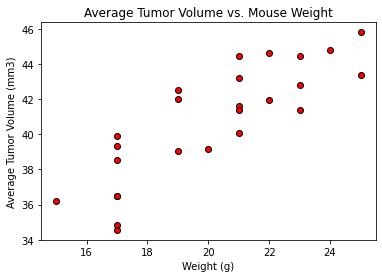

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Find the entries in the cleaned_df where the drug regimen was Capomulin
capomulin_regimen = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# Group the capomulin regimen by the average mouse ID
capomulin_regimen = capomulin_regimen.groupby(["Mouse ID"]).mean()

# Pull out the weight and tumor volumes of the grouped data
x_axis_capo = capomulin_regimen["Weight (g)"]
y_axis_capo = capomulin_regimen["Tumor Volume (mm3)"]

# Plot the results in a scatter plot
plt.scatter(x_axis_capo, y_axis_capo, marker= "o", facecolors="red", edgecolors="black")

# Add title and labels
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Correlation and Regression

The correlation between both factors is 0.84


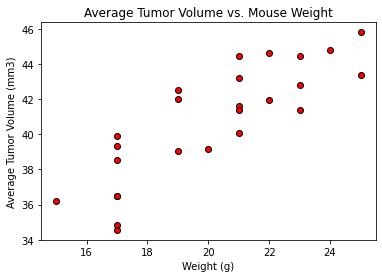

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Find the correlation coefficient
x_axis_capo = capomulin_regimen["Weight (g)"]
y_axis_capo = capomulin_regimen["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_axis_capo, y_axis_capo)

plt.scatter(x_axis_capo, y_axis_capo, marker= "o", facecolors="red", edgecolors="black")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between both factors is {round(correlation[0],2)}")

The r-squared value is 0.7088568047708717


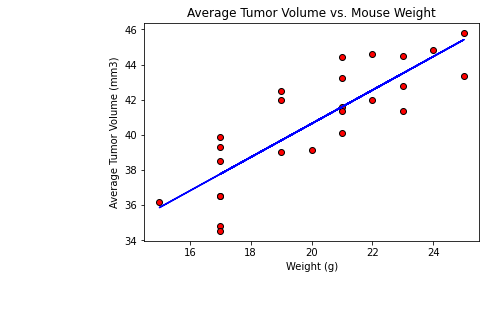

In [25]:
# Find the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_capo, y_axis_capo)
regress_values = x_axis_capo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_capo, y_axis_capo, marker= "o", facecolors="red", edgecolors="black")
plt.plot(x_axis_capo,regress_values,"r-", color = "blue")
plt.annotate(line_eq, (10,30), fontsize=15, color ="blue")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared value is {rvalue**2}")
plt.show()